In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())

In [3]:
X, y = mnist["data"], mnist["target"]

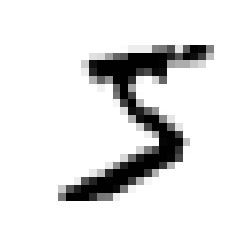

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[0]
y = y.astype(np.uint8)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
#Binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

array([ True])

In [20]:
sgd_clf.predict([some_digit])

array([ True])

In [21]:
#Implement a cross value classifier to 
#check accuracy, not always accurate as data is skewed and digit 5 is only 10% of the dataset.

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [23]:
#Below is code to prove that accuracy will always be above 90$
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X), 1), dtype=bool)

In [24]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [25]:
#Confusion matrix prediction.
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [28]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score : ", precision_score(y_train_5, y_train_pred))
print("Recall Score : ", recall_score(y_train_5, y_train_pred))

Precision Score :  0.8370879772350012
Recall Score :  0.6511713705958311


In [29]:
from sklearn.metrics import f1_score
print("f1 score : ", f1_score(y_train_5, y_train_pred))

f1 score :  0.7325171197343846
